# Bounds

In [23]:
import numpy as np
import pandas as pd
import scipy.sparse as spr

pd.options.mode.chained_assignment = None  # default='warn'

In [24]:
import sys
sys.path.insert(1, '/Users/pablo/Documents/GitHub/spillover-effects')

import spillover_effects as spef

## Data

In [25]:
# Read students data
data = pd.read_csv('Data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3085 entries, 0 to 3084
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school                  3085 non-null   int64  
 1   grade                   3085 non-null   int64  
 2   section                 3085 non-null   int64  
 3   classroom               3085 non-null   object 
 4   student                 3085 non-null   int64  
 5   computer_use            3073 non-null   float64
 6   won_lottery             3085 non-null   int64  
 7   male                    3024 non-null   float64
 8   age                     3026 non-null   float64
 9   n_siblings              3023 non-null   float64
 10  n_young_siblings        3026 non-null   float64
 11  father_lives_home       3016 non-null   float64
 12  father_works_home       3012 non-null   float64
 13  mother_works_home       3025 non-null   float64
 14  home_phone              2955 non-null   

In [26]:
# Read edges data
edges = pd.read_csv('Data/edges.csv')
edges.iloc[:10]

,student,friend1,friend2,friend3,friend4
0,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
1,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
2,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
3,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
4,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
5,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
6,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
7,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,NaN
8,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12
9,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12,2.083300e+12


In [27]:
# 1. Create adjacency matrix and array with nodes order
A, nodes = spef.utils.adjacency_matrix(edges, directed=True, nodes=data['student'].values)
A

Removed 28 self-loops


<3085x3085 sparse matrix of type '<class 'numpy.uint32'>'
	with 7350 stored elements in COOrdinate format>

In [28]:
# 2. Reorder data to match adjacency matrix order
data = data.set_index('student').loc[nodes].reset_index()
data.iloc[:10]

,student,school,grade,section,classroom,computer_use,won_lottery,male,age,n_siblings,...,home_phone,home_power,home_car,home_moto,past_computer_use,past_week_home,past_week_school,past_week_cafe,past_week_friend_house,past_week_other
0,2083300301002,208330,3,1,208330_3_1,544.0,0,1.0,7.0,2.0,...,0.0,1.0,0.0,0.0,380.0,1.0,1.0,1.0,0.0,0.0
1,2083300301003,208330,3,1,208330_3_1,0.0,0,1.0,8.0,1.0,...,0.0,1.0,0.0,0.0,102.0,0.0,1.0,0.0,0.0,0.0
2,2083300301005,208330,3,1,208330_3_1,116.0,1,0.0,8.0,2.0,...,1.0,1.0,0.0,1.0,280.0,0.0,1.0,0.0,0.0,0.0
3,2083300301006,208330,3,1,208330_3_1,380.0,0,1.0,9.0,6.0,...,1.0,1.0,1.0,1.0,140.0,0.0,1.0,0.0,0.0,0.0
4,2083300301007,208330,3,1,208330_3_1,102.0,0,1.0,9.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
5,2083300301008,208330,3,1,208330_3_1,360.0,0,0.0,8.0,3.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
6,2083300301009,208330,3,1,208330_3_1,120.0,0,1.0,8.0,3.0,...,1.0,1.0,1.0,0.0,502.0,1.0,1.0,1.0,1.0,1.0
7,2083300301010,208330,3,1,208330_3_1,450.0,0,0.0,8.0,2.0,...,0.0,1.0,1.0,0.0,441.0,1.0,1.0,0.0,0.0,1.0
8,2083300301011,208330,3,1,208330_3_1,240.0,1,0.0,8.0,4.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
9,2083300301013,208330,3,1,208330_3_1,60.0,0,0.0,8.0,2.0,...,1.0,1.0,0.0,0.0,120.0,1.0,1.0,0.0,0.0,0.0


In [29]:
# 3. Create exposure treatments and propensity score
n_treated = 4
# Direct exposure
data['ps_direct'] = spef.utils.spillover_pscore(A, n_treated, blocks=data['classroom'], exposure='direct')
# Social exposure
data['ps_spillover'] = spef.utils.spillover_pscore(A, n_treated, blocks=data['classroom'], exposure='spillover')
data['friend_won_lottery'] = spef.utils.spillover_treatment(data['won_lottery'], A)
# Overall exposure
data['overall_exposure'] = (data['won_lottery']) | (data['friend_won_lottery'])
data['ps_overall'] = 1 - (1 - data['ps_direct']) * (1 - data['ps_spillover'])
# Descriptive statistics
data[['ps_direct', 'ps_spillover', 'ps_overall', 'won_lottery', 'friend_won_lottery', 'overall_exposure']].describe().round(2)

,ps_direct,ps_spillover,ps_overall,won_lottery,friend_won_lottery,overall_exposure
count,3085.00,3085.00,3085.00,3085.00,3085.00,3085.00
mean,0.23,0.43,0.56,0.22,0.42,0.55
std,0.07,0.20,0.16,0.41,0.49,0.50
min,0.11,0.00,0.11,0.00,0.00,0.00
25%,0.17,0.32,0.46,0.00,0.00,0.00
50%,0.21,0.45,0.56,0.00,0.00,1.00
75%,0.27,0.56,0.66,0.00,1.00,1.00
max,0.80,1.00,1.00,1.00,1.00,1.00


In [30]:
# 4. Create kernel matrix for HAC standard errors
# Element i,j is 1 if the lenght of the shortest path between i and j is less than or equal to optimal bandwidth
weights, bandwidth = spef.utils.kernel(A)
print('Optimal bandwidth:', bandwidth)

Optimal bandwidth: 2


In [31]:
# 5. Conditional on positive (COP) effects

# Variables
outcome_base = 'computer_use'
outcome = 'log_use'
covariates = ['past_'+outcome_base, 'age', 'n_siblings', 'n_young_siblings', 'male',
              'father_lives_home', 'father_works_home', 'mother_works_home', 'home_phone', 'home_power', 'home_car', 'home_moto',
              'past_week_home', 'past_week_school', 'past_week_cafe', 'past_week_friend_house', 'past_week_other']

# Subgroups
subgroup1 = data['friend_won_lottery']==1
subgroup2 = data['friend_won_lottery']==0
subgroup3 = data['won_lottery']==1
subgroup4 = data['won_lottery']==0

# Selection
data.loc[data[outcome_base] >= 1, outcome_base] = data.loc[data[outcome_base] >= 1, outcome_base].clip(10, 720)
data['selection'] = (data[outcome_base] >= 1) * 1
selection = (data['selection'] == 1).values
data[outcome] = np.nan
data.loc[selection, outcome] = np.log(data.loc[selection, outcome_base])
data.groupby(['won_lottery', 'friend_won_lottery'])[outcome].describe(include=['count'], percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T.round(2)

won_lottery               0               1        
friend_won_lottery        0       1       0       1
count               1016.00  741.00  315.00  225.00
mean                   4.80    4.78    4.74    4.81
std                    0.79    0.77    0.81    0.73
min                    2.30    2.30    2.30    2.30
5%                     3.40    3.40    3.40    3.40
25%                    4.09    4.09    4.09    4.38
50%                    4.79    4.79    4.79    4.87
75%                    5.35    5.35    5.34    5.35
95%                    6.11    6.06    6.17    5.89
max                    6.58    6.58    6.58    6.58

In [32]:
# Normalized adjacency matrix
deg_seq = A @ np.ones(A.shape[0])
r, c = A.nonzero()
rD_sp = spr.csr_matrix(((1.0/np.maximum(deg_seq,1))[r], (r,c)), shape=(A.shape))
A_norm = A.multiply(rD_sp)

# Friends characteristics
var_friends = ['friends_'+cols for cols in covariates]
data.loc[:, var_friends] = A_norm @ data[covariates].fillna(0).values

# Add student network degree
data['degree'] = deg_seq
var_friends.append('degree')

## WLS assuming Missing at Random

### No Covariates

In [33]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
wls1 = spef.WLS(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                kernel_weights=weights, subsample=subgroup1, contrast='direct')

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
wls2 = spef.WLS(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                kernel_weights=weights, subsample=subgroup2, contrast='direct')

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
wls3 = spef.WLS(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                kernel_weights=weights, subsample=subgroup3, contrast='spillover')

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
wls4 = spef.WLS(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                kernel_weights=weights, subsample=subgroup4, contrast='spillover')

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
wls5 = spef.WLS(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', dataframe=data,
                kernel_weights=weights, contrast='overall')

1. Direct effect for individuals with winner friends
2. Direct effect for individuals with loser friends
3. Spillover effect for individuals that won the lottery
4. Spillover effect for individuals that lost the lottery
5. Overall effect for all individuals


In [34]:
# Concat results
results = pd.concat([wls1.summary.iloc[:1].round(3),
                     wls2.summary.iloc[:1].round(3),
                     wls3.summary.iloc[:1].round(3),
                     wls4.summary.iloc[:1].round(3),
                     wls5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends', 
                 'direct_nonwinner_friends', 
                 'spillover_winners', 
                 'spillover_nonwinners', 
                 'overall']
results

,coef,se,t-val,p-val,ci-low,ci-up
direct_winner_friends,0.026,0.072,0.363,0.716,-0.116,0.168
direct_nonwinner_friends,-0.039,0.066,-0.589,0.556,-0.167,0.090
spillover_winners,0.107,0.083,1.294,0.196,-0.055,0.270
spillover_nonwinners,-0.003,0.048,-0.052,0.958,-0.098,0.092
overall,-0.000,0.042,-0.006,0.995,-0.083,0.082


### With Covariates

In [35]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
wls1 = spef.WLS(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                kernel_weights=weights, name_x=covariates, subsample=subgroup1, contrast='direct')

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
wls2 = spef.WLS(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                kernel_weights=weights, name_x=covariates, subsample=subgroup2, contrast='direct')

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
wls3 = spef.WLS(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                kernel_weights=weights, name_x=covariates, subsample=subgroup3, contrast='spillover')

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
wls4 = spef.WLS(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                kernel_weights=weights, name_x=covariates, subsample=subgroup4, contrast='spillover')

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
wls5 = spef.WLS(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', dataframe=data,
                kernel_weights=weights, name_x=covariates, contrast='overall')

1. Direct effect for individuals with winner friends
2. Direct effect for individuals with loser friends
3. Spillover effect for individuals that won the lottery
4. Spillover effect for individuals that lost the lottery
5. Overall effect for all individuals


In [36]:
# Concat results
results = pd.concat([wls1.summary.iloc[:1].round(3),
                     wls2.summary.iloc[:1].round(3),
                     wls3.summary.iloc[:1].round(3),
                     wls4.summary.iloc[:1].round(3),
                     wls5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends',
                 'direct_nonwinner_friends',
                 'spillover_winners',
                 'spillover_nonwinners',
                 'overall']
results

,coef,se,t-val,p-val,ci-low,ci-up
direct_winner_friends,0.100,0.073,1.362,0.173,-0.044,0.244
direct_nonwinner_friends,-0.041,0.066,-0.623,0.533,-0.170,0.088
spillover_winners,0.166,0.085,1.953,0.051,-0.001,0.332
spillover_nonwinners,-0.024,0.052,-0.459,0.646,-0.125,0.077
overall,-0.010,0.044,-0.223,0.823,-0.096,0.076


## Spillover Bounds Parametric

### No Covariates

In [37]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
wls1 = spef.Bounds(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                   kernel_weights=weights, subsample=subgroup1, contrast='direct')

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
wls2 = spef.Bounds(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                   kernel_weights=weights, subsample=subgroup2, contrast='direct')

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
wls3 = spef.Bounds(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                   kernel_weights=weights, subsample=subgroup3, contrast='spillover')

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
wls4 = spef.Bounds(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=data,
                   kernel_weights=weights, subsample=subgroup4, contrast='spillover')

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
wls5 = spef.Bounds(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', dataframe=data,
                   kernel_weights=weights, contrast='overall')

1. Direct effect for individuals with winner friends
2. Direct effect for individuals with loser friends
3. Spillover effect for individuals that won the lottery
4. Spillover effect for individuals that lost the lottery
5. Overall effect for all individuals


In [38]:
# Concat results
results = pd.concat([wls1.summary.iloc[:1].round(3),
                     wls2.summary.iloc[:1].round(3),
                     wls3.summary.iloc[:1].round(3),
                     wls4.summary.iloc[:1].round(3),
                     wls5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends',
                 'direct_nonwinner_friends',
                 'spillover_winners',
                 'spillover_nonwinners',
                 'overall']
results

,lower-bound,upper-bound,ci-low,ci-up
direct_winner_friends,-0.127,0.221,-0.253,0.334
direct_nonwinner_friends,-0.221,0.131,-0.339,0.252
spillover_winners,0.068,0.153,-0.091,0.318
spillover_nonwinners,-0.018,0.015,-0.125,0.114
overall,-0.091,0.078,-0.174,0.165


In [39]:
print('direct_winner_friends: {:.2f}'.format(wls1.p_hat))
print('direct_nonwinner_friends: {:.2f}'.format(wls2.p_hat))
print('spillover_winners: {:.2f}'.format(wls3.p_hat))
print('spillover_nonwinners: {:.2f}'.format(wls4.p_hat))
print('overall: {:.2f}'.format(wls5.p_hat))

direct_winner_friends: 0.87
direct_nonwinner_friends: 0.90
spillover_winners: 0.97
spillover_nonwinners: 0.99
overall: 0.95


### With Covariates

In [42]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
pmt1 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup1, contrast='direct',
                     n_splits=10, method='parametric', interaction='none', verbose=False, seed=42)

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
pmt2 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup2, contrast='direct',
                     n_splits=10, method='parametric', interaction='none', verbose=False, seed=42)

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
pmt3 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup3, contrast='spillover',
                     n_splits=10, method='parametric', interaction='none', verbose=False, seed=42)

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
pmt4 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup4, contrast='spillover',
                     n_splits=10, method='parametric', interaction='none', verbose=False, seed=42)

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
pmt5 = spef.BoundsML(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, contrast='overall',
                     n_splits=10, method='parametric', interaction='none', verbose=False, seed=42)

1. Direct effect for individuals with winner friends


In [ ]:
# Concat results
results = pd.concat([pmt1.summary.iloc[:1].round(3),
                     pmt2.summary.iloc[:1].round(3),
                     pmt3.summary.iloc[:1].round(3),
                     pmt4.summary.iloc[:1].round(3),
                     pmt5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends',
                 'direct_nonwinner_friends',
                 'spillover_winners',
                 'spillover_nonwinners',
                 'overall']
results

,lower-bound,upper-bound,ci-low,ci-up
direct_winner_friends,-0.089,0.144,-0.117,0.186
direct_nonwinner_friends,-0.209,-0.105,-0.276,-0.071
spillover_winners,0.505,0.568,0.333,0.763
spillover_nonwinners,-0.130,0.096,-0.180,0.133
overall,-0.219,-0.068,-0.302,-0.042


## Spillover Bounds DML

In [20]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
las1 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup1, contrast='direct',
                     n_splits=10, n_cvs=10, method='lasso', interaction='none', verbose=True, seed=42,
                     lambdas_proba=np.linspace(1, 10, 50), lambdas_quant=np.linspace(0.001, 0.005, 50))
print('')

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
las2 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup2, contrast='direct',
                     n_splits=10, n_cvs=10, method='lasso', interaction='none', verbose=True, seed=42,
                     lambdas_proba=np.linspace(1, 10, 50), lambdas_quant=np.linspace(0.001, 0.005, 50))
print('')

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
las3 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup3, contrast='spillover',
                     n_splits=10, n_cvs=10, method='lasso', interaction='none', verbose=True, seed=42,
                     lambdas_proba=np.linspace(1, 10, 50), lambdas_quant=np.linspace(0.001, 0.005, 50))
print('')

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
las4 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup4, contrast='spillover',
                     n_splits=10, n_cvs=10, method='lasso', interaction='none', verbose=True, seed=42,
                     lambdas_proba=np.linspace(1, 10, 50), lambdas_quant=np.linspace(0.0001, 0.002, 50))
print('')

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
las5 = spef.BoundsML(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, contrast='overall',
                     n_splits=10, n_cvs=10, method='lasso', interaction='none', verbose=True, seed=42,
                     lambdas_proba=np.linspace(1, 10, 50), lambdas_quant=np.linspace(0.0001, 0.002, 50))

1. Direct effect for individuals with winner friends
Predicted probabilities with method: postlasso-logit
1) 12 (70.6%) selected variables; lambda=3.20; accuracy=0.75
2) 14 (82.4%) selected variables; lambda=3.20; accuracy=0.75
3) 15 (88.2%) selected variables; lambda=3.20; accuracy=0.76
4) 14 (82.4%) selected variables; lambda=3.20; accuracy=0.75
5) 14 (82.4%) selected variables; lambda=3.20; accuracy=0.75
6) 12 (70.6%) selected variables; lambda=3.20; accuracy=0.75
7) 12 (70.6%) selected variables; lambda=3.20; accuracy=0.75
8) 15 (88.2%) selected variables; lambda=3.20; accuracy=0.75
9) 14 (82.4%) selected variables; lambda=3.20; accuracy=0.75
10) 15 (88.2%) selected variables; lambda=3.20; accuracy=0.75
Conditional quantiles with method: postlasso-qr
1) q10: 13 (76.5%) selected variables; lambda=0.005; R2=-1.93
1) q90: 10 (52.9%) selected variables; lambda=0.005; R2=-1.23
2) q10: 15 (88.2%) selected variables; lambda=0.005; R2=-0.69
2) q90: 9 (47.1%) selected variables; lambda=0.00

In [21]:
# Concat results
results = pd.concat([las1.summary.iloc[:1].round(3),
                     las2.summary.iloc[:1].round(3),
                     las3.summary.iloc[:1].round(3),
                     las4.summary.iloc[:1].round(3),
                     las5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends',
                 'direct_nonwinner_friends',
                 'spillover_winners',
                 'spillover_nonwinners',
                 'overall']
results

,lower-bound,upper-bound,ci-low,ci-up
direct_winner_friends,0.213,0.246,0.160,0.307
direct_nonwinner_friends,-0.267,-0.051,-0.345,-0.036
spillover_winners,0.134,0.199,0.106,0.239
spillover_nonwinners,0.378,0.444,0.279,0.560
overall,-0.037,0.311,-0.047,0.386


In [22]:
# 1. Direct effect for individuals with winner friends
print('1. Direct effect for individuals with winner friends')
aml1 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup1, contrast='direct',
                     n_splits=10, n_cvs=10, method='automl', timestop=30, interaction='none', verbose=True, seed=42)
print('')

# 2. Direct effect for individuals with loser friends
print('2. Direct effect for individuals with loser friends')
aml2 = spef.BoundsML(name_y=outcome, name_z='won_lottery', name_pscore='ps_direct', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup2, contrast='direct',
                     n_splits=10, n_cvs=10, method='automl', timestop=30, interaction='none', verbose=True, seed=42)
print('')

# 3. Spillover effect for individuals that won the lottery
print('3. Spillover effect for individuals that won the lottery')
aml3 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup3, contrast='spillover',
                     n_splits=10, n_cvs=10, method='automl', timestop=30, interaction='none', verbose=True, seed=42)
print('')

# 4. Spillover effect for individuals that lost the lottery
print('4. Spillover effect for individuals that lost the lottery')
aml4 = spef.BoundsML(name_y=outcome, name_z='friend_won_lottery', name_pscore='ps_spillover', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, subsample=subgroup4, contrast='spillover',
                     n_splits=10, n_cvs=10, method='automl', timestop=30, interaction='none', verbose=True, seed=42)
print('')

# 5. Overall effect for all individuals
print('5. Overall effect for all individuals')
aml5 = spef.BoundsML(name_y=outcome, name_z='overall_exposure', name_pscore='ps_overall', name_x=covariates+var_friends, dataframe=data,
                     kernel_weights=weights, contrast='overall',
                     n_splits=10, n_cvs=10, method='automl', timestop=30, interaction='none', verbose=True, seed=42)

1. Direct effect for individuals with winner friends
Predicted probabilities with method: automl
1) lgbm; accuracy=0.75
2) lgbm; accuracy=0.76
3) lgbm; accuracy=0.75
4) lgbm; accuracy=0.75
5) lgbm; accuracy=0.75
6) lgbm; accuracy=0.75
7) lgbm; accuracy=0.74
8) lgbm; accuracy=0.75
9) lgbm; accuracy=0.75
10) lgbm; accuracy=0.74
Conditional quantiles with method: gradient-boosting
1) q1: R2 = -4.82
1) q10: R2 = -2.36
1) q25: R2 = -0.54
1) q75: R2 = -0.30
1) q90: R2 = -1.08
1) q99: R2 = -3.55
2) q1: R2 = -3.32
2) q10: R2 = -0.70
2) q25: R2 = 0.00
2) q75: R2 = -0.90
2) q90: R2 = -1.82
2) q99: R2 = -4.60
3) q1: R2 = -4.05
3) q10: R2 = -1.94
3) q25: R2 = -0.40
3) q75: R2 = -0.32
3) q90: R2 = -1.02
3) q99: R2 = -3.47
4) q1: R2 = -5.26
4) q10: R2 = -1.66
4) q25: R2 = -0.62
4) q75: R2 = -0.32
4) q90: R2 = -0.98
4) q99: R2 = -3.90
5) q1: R2 = -2.91
5) q10: R2 = -1.18
5) q25: R2 = -0.32
5) q75: R2 = -0.39
5) q90: R2 = -1.13
5) q99: R2 = -3.80
6) q1: R2 = -4.22
6) q10: R2 = -1.26
6) q25: R2 = -0.17

In [23]:
# Concat results
results = pd.concat([aml1.summary.iloc[:1].round(3),
                     aml2.summary.iloc[:1].round(3),
                     aml3.summary.iloc[:1].round(3),
                     aml4.summary.iloc[:1].round(3),
                     aml5.summary.iloc[:1].round(3)])
results.index = ['direct_winner_friends',
                 'direct_nonwinner_friends',
                 'spillover_winner_friends',
                 'spillover_nonwinner_friends',
                 'overall']
results

,lower-bound,upper-bound,ci-low,ci-up
direct_winner_friends,-0.051,0.359,-0.067,0.458
direct_nonwinner_friends,-0.225,0.248,-0.285,0.315
spillover_winner_friends,0.241,0.496,0.217,0.542
spillover_nonwinner_friends,0.093,0.414,0.076,0.489
overall,-0.130,0.223,-0.170,0.292


## Plots

### Boxplots

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True, 
    "pgf.rcfonts": False
})

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

path_fig = "/Users/pablo/Library/CloudStorage/Dropbox/Apps/Overleaf/Spillover Selection/sections/figures/"

In [25]:
# Concat results
res_pmt = pd.concat([pmt1.summary.iloc[:1].round(3), pmt2.summary.iloc[:1].round(3),
                     pmt3.summary.iloc[:1].round(3), pmt4.summary.iloc[:1].round(3),
                     pmt5.summary.iloc[:1].round(3)])
res_las = pd.concat([las1.summary.iloc[:1].round(3), las2.summary.iloc[:1].round(3),
                     las3.summary.iloc[:1].round(3), las4.summary.iloc[:1].round(3),
                     las5.summary.iloc[:1].round(3)])
res_aml = pd.concat([aml1.summary.iloc[:1].round(3), aml2.summary.iloc[:1].round(3),
                     aml3.summary.iloc[:1].round(3), aml4.summary.iloc[:1].round(3),
                     aml5.summary.iloc[:1].round(3)])

In [26]:
def stats_for_barplot(results):
    """
    Function to get the stats for the barplot using 'results' numpy array
    """
    total = results.shape[0]
    stats = []
    for i in range(total):
        stats.append({'med': 0, 'q1': results[i, 0], 'q3': results[i, 1],
                      'whislo': results[i, 2], 'whishi': results[i, 3]})
    return stats

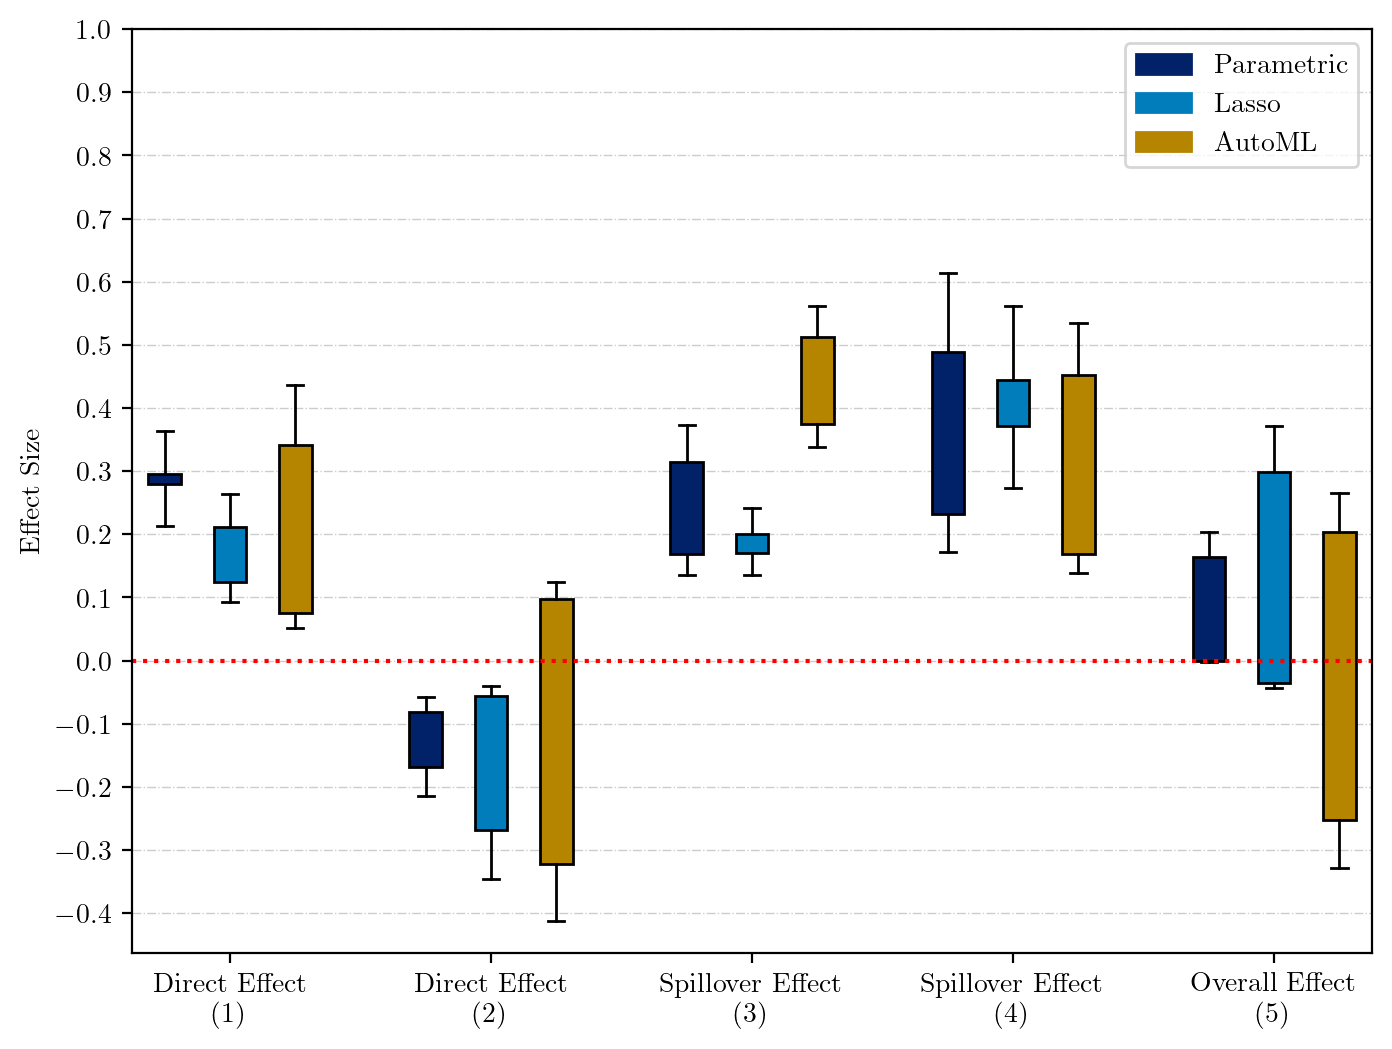

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

xlabels = ['Direct Effect\n(1)', 'Direct Effect\n(2)', 'Spillover Effect\n(3)', 'Spillover Effect\n(4)', 'Overall Effect\n(5)']

# Create boxplot statistics
pos = np.array([1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19])
stats_pmt = stats_for_barplot(res_pmt.values)
stats_las = stats_for_barplot(res_las.values)
stats_aml = stats_for_barplot(res_aml.values)
stats_all = []
for i in range(len(stats_pmt)):
    stats_all.append(stats_pmt[i])
    stats_all.append(stats_las[i])
    stats_all.append(stats_aml[i])
bplot = ax.bxp(stats_all, patch_artist=True, medianprops={'linewidth':0}, showfliers=False, positions=pos)
# Horizontal line at 0
ax.axhline(y=0, color='red', linestyle=':')
# Axis
ax.set_xticks(np.arange(2, 20, 4))
ax.set_xticklabels(xlabels)
ax.set_ylabel('Effect Size')
ax.set_yticks(np.arange(-0.4, 1.1, 0.1))
# Grid
ax.grid(axis='y', color='black', linestyle ='-.', linewidth=0.5, alpha=0.2)
# Legend
colors = ['#012169', '#007dba', '#b58500']
labels = ['Parametric', 'Lasso', 'AutoML']
patches = [Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]
ax.legend(handles=patches, loc='upper right')
# Colors
colors = ['#012169', '#007dba', '#b58500'] * 5
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.savefig(path_fig + 'effects_with_cov.pgf', dpi=500, bbox_inches='tight', transparent=True)
# plt.show()

### Networks

In [30]:
import networkx as nx

G = nx.from_scipy_sparse_array(A)

In [31]:
list(nx.nodes_with_selfloops(G))

[50,
 106,
 148,
 259,
 264,
 271,
 447,
 779,
 819,
 1172,
 1175,
 1309,
 1386,
 1458,
 1477,
 1502,
 1654,
 1677,
 1707,
 1913,
 2225,
 2228,
 2287,
 2304,
 2571,
 2881,
 2938,
 2942]

In [33]:
nx.number_of_selfloops(G)

28

In [34]:
G.remove_edges_from(nx.selfloop_edges(G))

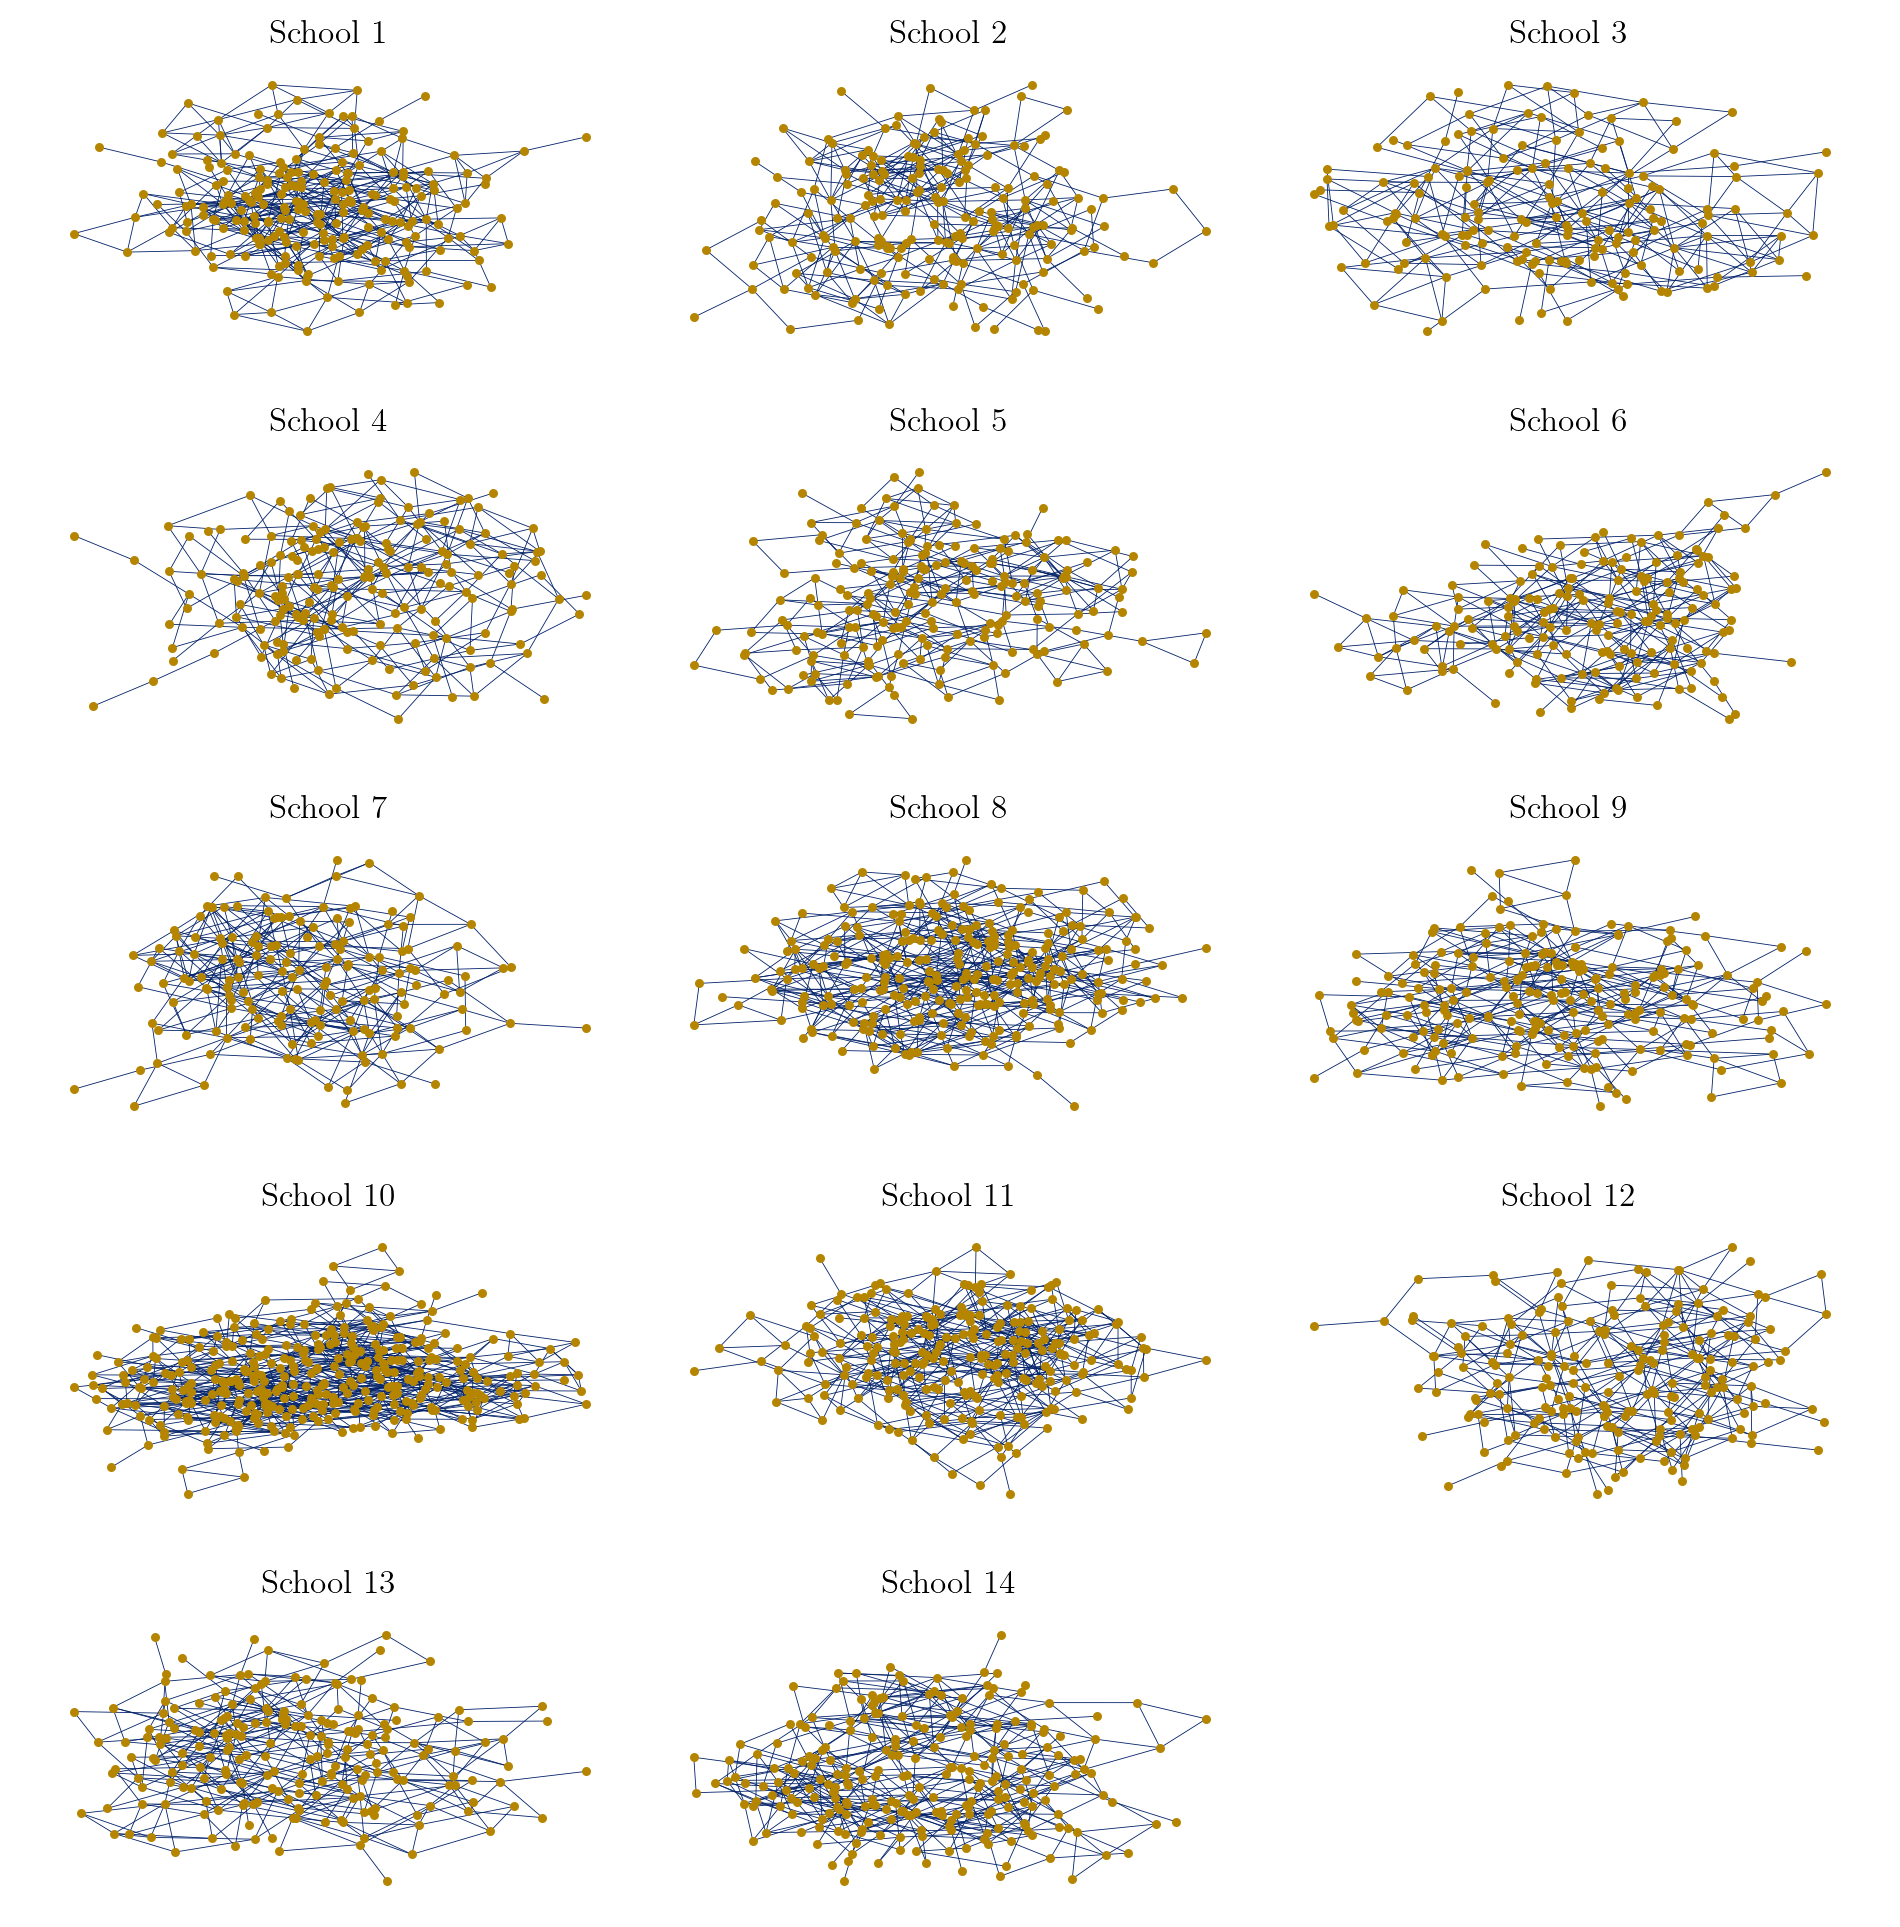

In [36]:
unique_schools = data['school'].unique()

fig, axes = plt.subplots(figsize=(12, 12), nrows=5, ncols=3)

for i, sch in enumerate(unique_schools):
    S = G.subgraph(data[data['school'] == sch].index)
    pos = nx.kamada_kawai_layout(S)
    nx.draw(S, pos=pos, node_size=5, width=0.3, node_color='#b58500', edge_color='#012169', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'School {i+1}')

fig.delaxes(axes[4, 2])
plt.subplots_adjust(wspace=0, hspace=0.3)

# plt.savefig(path_fig + 'school_networks.pgf', dpi=500, bbox_inches='tight', transparent=True)

## Test Spillovers

In [ ]:
wls_res = spef.WLS(name_y='selection', name_z='won_lottery', name_pscore='ps_direct', dataframe=data,
                   kernel_weights=weights, contrast='spillover')
wls_res.summary

,coef,se,t-val,p-val,ci-low,ci-up
spillover,0.091650,0.020819,4.402302,0.000011,0.050846,0.132453
won_lottery0,0.724197,0.012962,55.871067,0.000000,0.698792,0.749602
won_lottery1,0.815847,0.018731,43.555273,0.000000,0.779134,0.852559


In [ ]:
wls_res.params[1] - wls_res.params[0]

0.09164950408939054

In [ ]:
import numpy as np

def permutation_task(i, adj_mat, df, focal, weights):
    z_temp = df['won_lottery'].copy()
    z_temp[~focal] = np.random.permutation(df.loc[~focal, 'won_lottery'])  # permute treatments for auxiliary vertices only
    z_temp_peers = adj_mat @ z_temp  # re-compute number of peers treated
    df_temp = df[['selection', 'ps_spillover']].copy()
    df_temp['friend_won_lottery'] = z_temp_peers
    wls_res = spef.WLS(name_y='selection', name_z='friend_won_lottery', name_pscore='ps_spillover', dataframe=df_temp,
                       kernel_weights=weights, contrast='spillover')
    return wls_res.params[1] - wls_res.params[0]

def do_focal_aux_permutation(adj_mat, df, focal, weights, R=1000):
    results = []
    for i in range(R):
        result = permutation_task(i, adj_mat, df, focal, weights)
        results.append(result)
    return results

# Example usage
is_focal = np.random.binomial(1, 0.25, data.shape[0]).astype(bool)
results = do_focal_aux_permutation(A, data, is_focal, weights)

In [ ]:
2 * np.min([np.mean((wls_res.params[1] - wls_res.params[0]) > results), np.mean((wls_res.params[1] - wls_res.params[0]) < results)])

0.892

p-value of 0.89 -> I can't reject the null hypothesis of no spillover effects. This is bad